## RandomForest Regressor:

Since  the output of the linear model like Linear and Elastic Regression performing not so well on the training and test data that I had (It had a negative R2_score), I prefer to use Random Forest ensemble method which is a non linear model. In this, I use a Regressor, since my output contains a Regression task. It uses multiple decision trees and a technique called as bagging. This combines multiple decision trees in determining the final output rather than relying on individual decision trees. So let me dive into how things work below.

### Importing the dataset and necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importing the required csv files saved previously from our feature and target files

X = pd.read_csv('../Capstone_1_project/Capstone_1_Non_Linear_model/cleaned_df.csv').set_index('id')
y = pd.read_csv('../Capstone_1_project/Capstone_1_Non_Linear_model/price_df.csv').set_index('id')

In [49]:
# Splitting data into train and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [5]:
rfr = RandomForestRegressor(random_state=42)

Here I set the parameter grid for selecting the best parameters using GridSearchCV for my RandomForestRegressor. It also contains cross validation within the Gridsearch on the dataset. This method is called hyperparameter tuning, where optimization is the key factor for selecting the best parameters.

In [22]:
param_grid = { 
    'n_estimators': [500, 700, 1000],
    'max_features': ['auto'],
    'max_depth' : [8, 10, 12],
    'min_samples_split': [5],
    'bootstrap': [True]
}

In [23]:
#Using GridSearchCV for optimal hyperparameters and noting how much time it takes to train the model

%%time
CV_rfc = GridSearchCV(estimator=rfr, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, np.ravel(y_train))

Wall time: 34min 13s


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'bootstrap': [True], 'max_depth':

In [24]:
CV_rfc.best_params_

{'bootstrap': True,
 'max_depth': 12,
 'max_features': 'auto',
 'min_samples_split': 5,
 'n_estimators': 1000}

In [51]:
#Using RFR with the best parameters obtained from GridSearchCV

rfc1=RandomForestRegressor(max_features='auto', n_estimators= 500, max_depth=12, min_samples_split=5, min_samples_leaf=2, bootstrap=True, oob_score=True, random_state=42)

In [52]:
# Training the RFR model

rfc1.fit(X_train, np.ravel(y_train))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=True, random_state=42, verbose=0,
                      warm_start=False)

In [53]:
# Detecting the Out of Bag score to estimate how much accurate our test prediction would be.

rfc1.oob_score_

0.5323900374561197

In [54]:
# Predicting the training and testing sets

y_pred = rfc1.predict(X_train)
y_test_pred = rfc1.predict(X_test)

In [55]:
from sklearn.metrics import r2_score, mean_squared_error

In [56]:
print(f"Training RMSE: {np.sqrt(mean_squared_error(y_train, y_pred))}")
print(f"Train R2 score: {r2_score(y_train, y_pred)}")

print(f"Testing RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred))}")
print(f"Test R2 score: {r2_score(y_test, y_test_pred)}")

Training RMSE: 21.177701538620017
Train R2 score: 0.7507015651165291
Testing RMSE: 27.226294551504427
Test R2 score: 0.572981123061638


From the above scores, we see that the training score is almost 75% which the model fits very well on seen data. Our testing score is around 57% which does a pretty decent job on unseen data. But still there is some room for improvement like selecting some more features(feature engineering), tweaking a few parameters to obtain some more best results(even though not likely everytime it succeeds).

In [14]:
# important features in form of ndarray.
rfc1.feature_importances_

array([2.80832349e-01, 5.49309386e-02, 1.59601340e-01, 1.18460169e-01,
       2.70439025e-02, 6.38643371e-02, 4.27776252e-02, 4.40713975e-02,
       6.68420317e-03, 0.00000000e+00, 0.00000000e+00, 6.65070816e-03,
       5.44924738e-03, 1.13302358e-01, 3.88719645e-02, 4.43306906e-06,
       5.55728513e-06, 4.32491948e-03, 4.20901348e-03, 0.00000000e+00,
       4.92932428e-03, 4.61292436e-03, 8.78424405e-03, 1.29284384e-03,
       9.29620013e-03])

In [15]:
# extract the numerical values of feature importance from the Random Forest Regressor
importances = rfc1.feature_importances_

#create a feature list from the original dataset (list of columns)
feature_list = list(X.columns)

#create a list of tuples
feature_importance= sorted(zip(importances, feature_list), reverse=True)

#create two lists from the previous list of tuples
df = pd.DataFrame(feature_importance, columns=['importance', 'feature'])
importance= list(df['importance'])
feature= list(df['feature'])

#see df
print(df)

    importance                                          feature
0     0.280832                                     accommodates
1     0.159601                                         bedrooms
2     0.118460                                     cleaning_fee
3     0.113302                            distance_to_midcenter
4     0.063864                                     extra_people
5     0.054931                                        bathrooms
6     0.044071                                   minimum_nights
7     0.042778                                  guests_included
8     0.038872                                             size
9     0.027044                                 security_deposit
10    0.009296              cancellation_policy_super_strict_60
11    0.008784  cancellation_policy_strict_14_with_grace_period
12    0.006684                                host_is_superhost
13    0.006651                                  Host_greets_you
14    0.005449                          

Text(0, 0.5, 'Features')

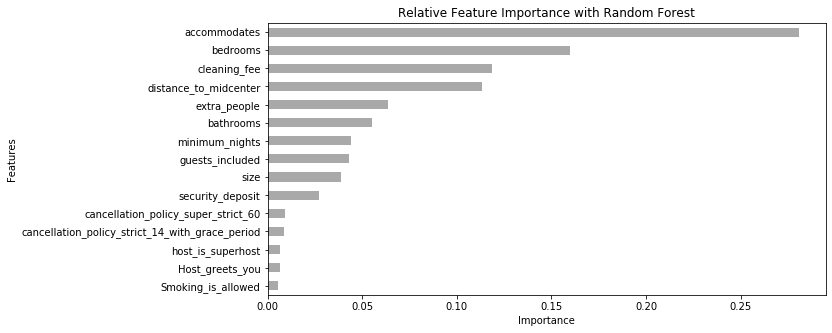

In [16]:
# plot the important features
feat_importances = pd.Series(rfc1.feature_importances_, index=X.columns)
feat_importances.nlargest(15).sort_values().plot(kind='barh', color='darkgrey', figsize=(10,5))
plt.title('Relative Feature Importance with Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')

The above bar plot shows the feature importances of different features. From that, it is evident that the most important are accommodates, bedrooms, cleaning_fee and distance_to_midcenter. Ofcourse, there might be other features too(which are not included in the above models), which might have a more/less impact in determing the **output of a price**, but that is for a later time to work on it.

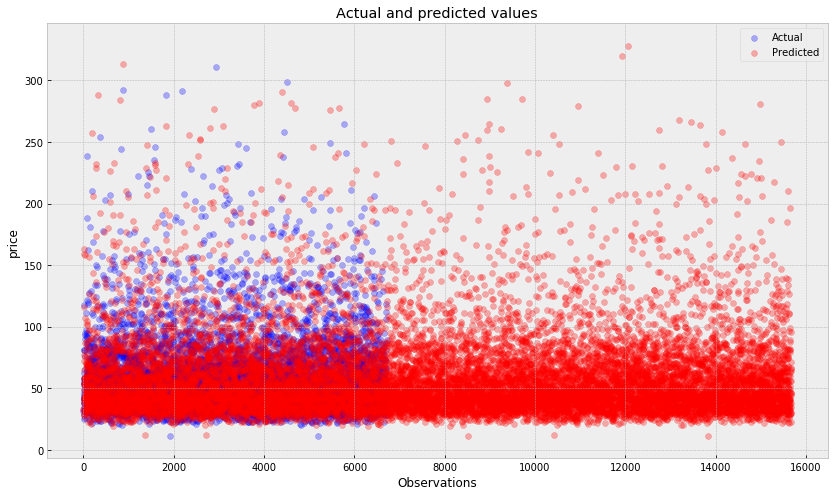

In [40]:
import matplotlib.pyplot as plt
_, ax = plt.subplots(figsize=(14, 8))

ax.scatter(x = range(0, y_test_pred.size), y=y_test_pred, c = 'blue', label = 'Actual', alpha = 0.3)
ax.scatter(x = range(0, y_pred.size), y=y_pred, c = 'red', label = 'Predicted', alpha = 0.3)

plt.title('Actual and predicted values')
plt.xlabel('Observations')
plt.ylabel('price')
plt.legend()
plt.show()

Scatter plot of actual vs predicted output. It can be seen from the plot that my model did a pretty good job in detecting the output of the price with regards to the features included in my model.

In [22]:
print(X_train.shape)
print(X_test.shape)
print(len(y_train))
print(len(y_test))

(15673, 25)
(6718, 25)
15673
6718


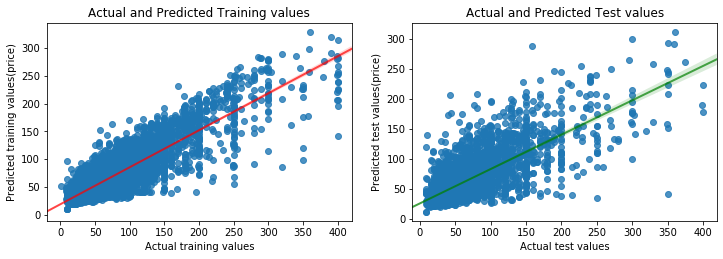

In [33]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.regplot(y_train, y_pred, line_kws={"color":"r","alpha":0.7,"lw":2})
plt.xlabel('Actual training values')
plt.ylabel('Predicted training values(price)')
plt.title('Actual and Predicted Training values')
plt.subplot(2,2,2)
sns.regplot(y_test, y_test_pred,  line_kws={"color":"g","alpha":0.7,"lw":2})
plt.xlabel('Actual test values')
plt.ylabel('Predicted test values(price)')
plt.title('Actual and Predicted Test values')
plt.show()